# F1 Data Analysis

In [66]:
import fastf1
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from core.extract import F1DataProcessor
from core.telemetry import F1TelemetryAnalyzer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
valid_event_formats = ["conventional", "sprint_qualifying"]

events = fastf1.get_event_schedule(2024)
events = events[(events["EventDate"]<=datetime.datetime.today()) & (events["EventFormat"].isin(valid_event_formats))]
events.head()

req         WARNING 	DEFAULT CACHE ENABLED! (4.24 GB) /Users/katecastillo/Library/Caches/fastf1


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True
5,5,China,Shanghai,FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,2024-04-21,Chinese Grand Prix,sprint_qualifying,Practice 1,2024-04-19 11:30:00+08:00,2024-04-19 03:30:00,...,Sprint,2024-04-20 11:00:00+08:00,2024-04-20 03:00:00,Qualifying,2024-04-20 15:00:00+08:00,2024-04-20 07:00:00,Race,2024-04-21 15:00:00+08:00,2024-04-21 07:00:00,True


## Extracting Qualifying Data

In [5]:
f1_processor = F1DataProcessor("cache", 2024)
quali_data, quali_lap_data = f1_processor.get_quali_session(range(1,22))

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
/Users/katecastillo/Documents/learning/f1-exploration/utils/extract.py:112: SettingWithCopyWarning: 
A value 

In [6]:
quali_data

,Round,Driver,DriverNumber,Team,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,...,FreshTyre,TrackStatus,Deleted,DeletedReason,LapStartDate,LapEndDate,QualiSession,LapRank,CurrentFastestLap,DeltaFastestLap
54,1,SAI,55,Ferrari,0 days 00:01:31.208000,2.0,1.0,29.760,38.878,22.570,...,True,1,False,,2024-03-01 16:02:03.438,2024-03-01 16:03:34.646,1.0,1.0,0 days 00:01:31.208000,0.000
18,1,LEC,16,Ferrari,0 days 00:01:31.260000,2.0,1.0,29.522,39.009,22.729,...,True,1,False,,2024-03-01 16:02:12.510,2024-03-01 16:03:43.770,1.0,2.0,0 days 00:01:31.208000,0.052
250,1,OCO,31,Alpine,0 days 00:01:31.990000,2.0,1.0,29.755,39.305,22.930,...,True,1,False,,2024-03-01 16:02:25.128,2024-03-01 16:03:57.118,1.0,3.0,0 days 00:01:31.208000,0.782
259,1,GAS,10,Alpine,0 days 00:01:32.434000,2.0,1.0,29.870,39.498,23.066,...,True,1,True,TRACK LIMITS AT TURN 13 LAP 3,2024-03-01 16:02:32.131,2024-03-01 16:04:04.565,1.0,4.0,0 days 00:01:31.208000,1.226
196,1,ALB,23,Williams,0 days 00:01:30.692000,2.0,1.0,29.194,38.750,22.748,...,True,1,False,,2024-03-01 16:07:17.366,2024-03-01 16:08:48.058,1.0,1.0,0 days 00:01:30.692000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,21,TSU,22,RB,0 days 00:01:24.111000,29.0,8.0,21.510,44.415,18.186,...,True,1,False,,2024-11-03 12:10:46.850,2024-11-03 12:12:10.961,3.0,2.0,0 days 00:01:24.092000,0.019
121,21,OCO,31,Alpine,0 days 00:01:24.475000,30.0,8.0,21.545,44.500,18.430,...,True,1,False,,2024-11-03 12:10:55.961,2024-11-03 12:12:20.436,3.0,4.0,0 days 00:01:24.092000,0.383
31,21,NOR,4,McLaren,0 days 00:01:23.405000,32.0,8.0,21.639,43.807,17.959,...,True,1,False,,2024-11-03 12:11:07.320,2024-11-03 12:12:30.725,3.0,1.0,0 days 00:01:23.405000,0.000
60,21,RUS,63,Mercedes,0 days 00:01:23.578000,28.0,8.0,21.463,44.025,18.090,...,True,1,False,,2024-11-03 12:11:21.578,2024-11-03 12:12:45.156,3.0,2.0,0 days 00:01:23.405000,0.173


In [7]:
quali_lap_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapNumber,CumulativeDistance,Driver,Round
0,2024-03-01 16:08:56.760,10645,297,7,100,0,12,car,0 days 00:00:00.107000,0 days 00:22:21.087000,8.827500,1,0.000000,VER,1
1,2024-03-01 16:08:56.920,10674,299,8,100,0,12,car,0 days 00:00:00.267000,0 days 00:22:21.247000,22.116389,1,13.288889,VER,1
2,2024-03-01 16:08:57.120,10747,301,8,100,0,12,car,0 days 00:00:00.467000,0 days 00:22:21.447000,38.838611,1,43.300000,VER,1
3,2024-03-01 16:08:57.280,10785,303,8,100,0,12,car,0 days 00:00:00.627000,0 days 00:22:21.607000,52.305278,1,86.777778,VER,1
4,2024-03-01 16:08:57.441,10850,305,8,100,0,12,car,0 days 00:00:00.788000,0 days 00:22:21.768000,65.945556,1,143.895833,VER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,2024-11-03 10:57:09.022,11618,292,7,100,0,9,car,0 days 00:24:37.945000,0 days 00:42:06.907000,42506.542778,8,699302.730000,ZHO,21
5530,2024-11-03 10:57:09.342,11617,294,7,100,0,9,car,0 days 00:24:38.265000,0 days 00:42:07.227000,42532.676111,8,703461.113056,ZHO,21
5531,2024-11-03 10:57:09.622,11645,293,7,100,0,9,car,0 days 00:24:38.545000,0 days 00:42:07.507000,42555.465000,8,707642.285000,ZHO,21
5532,2024-11-03 10:57:10.022,11654,294,7,100,0,9,car,0 days 00:24:38.945000,0 days 00:42:07.907000,42588.131667,8,711856.123611,ZHO,21


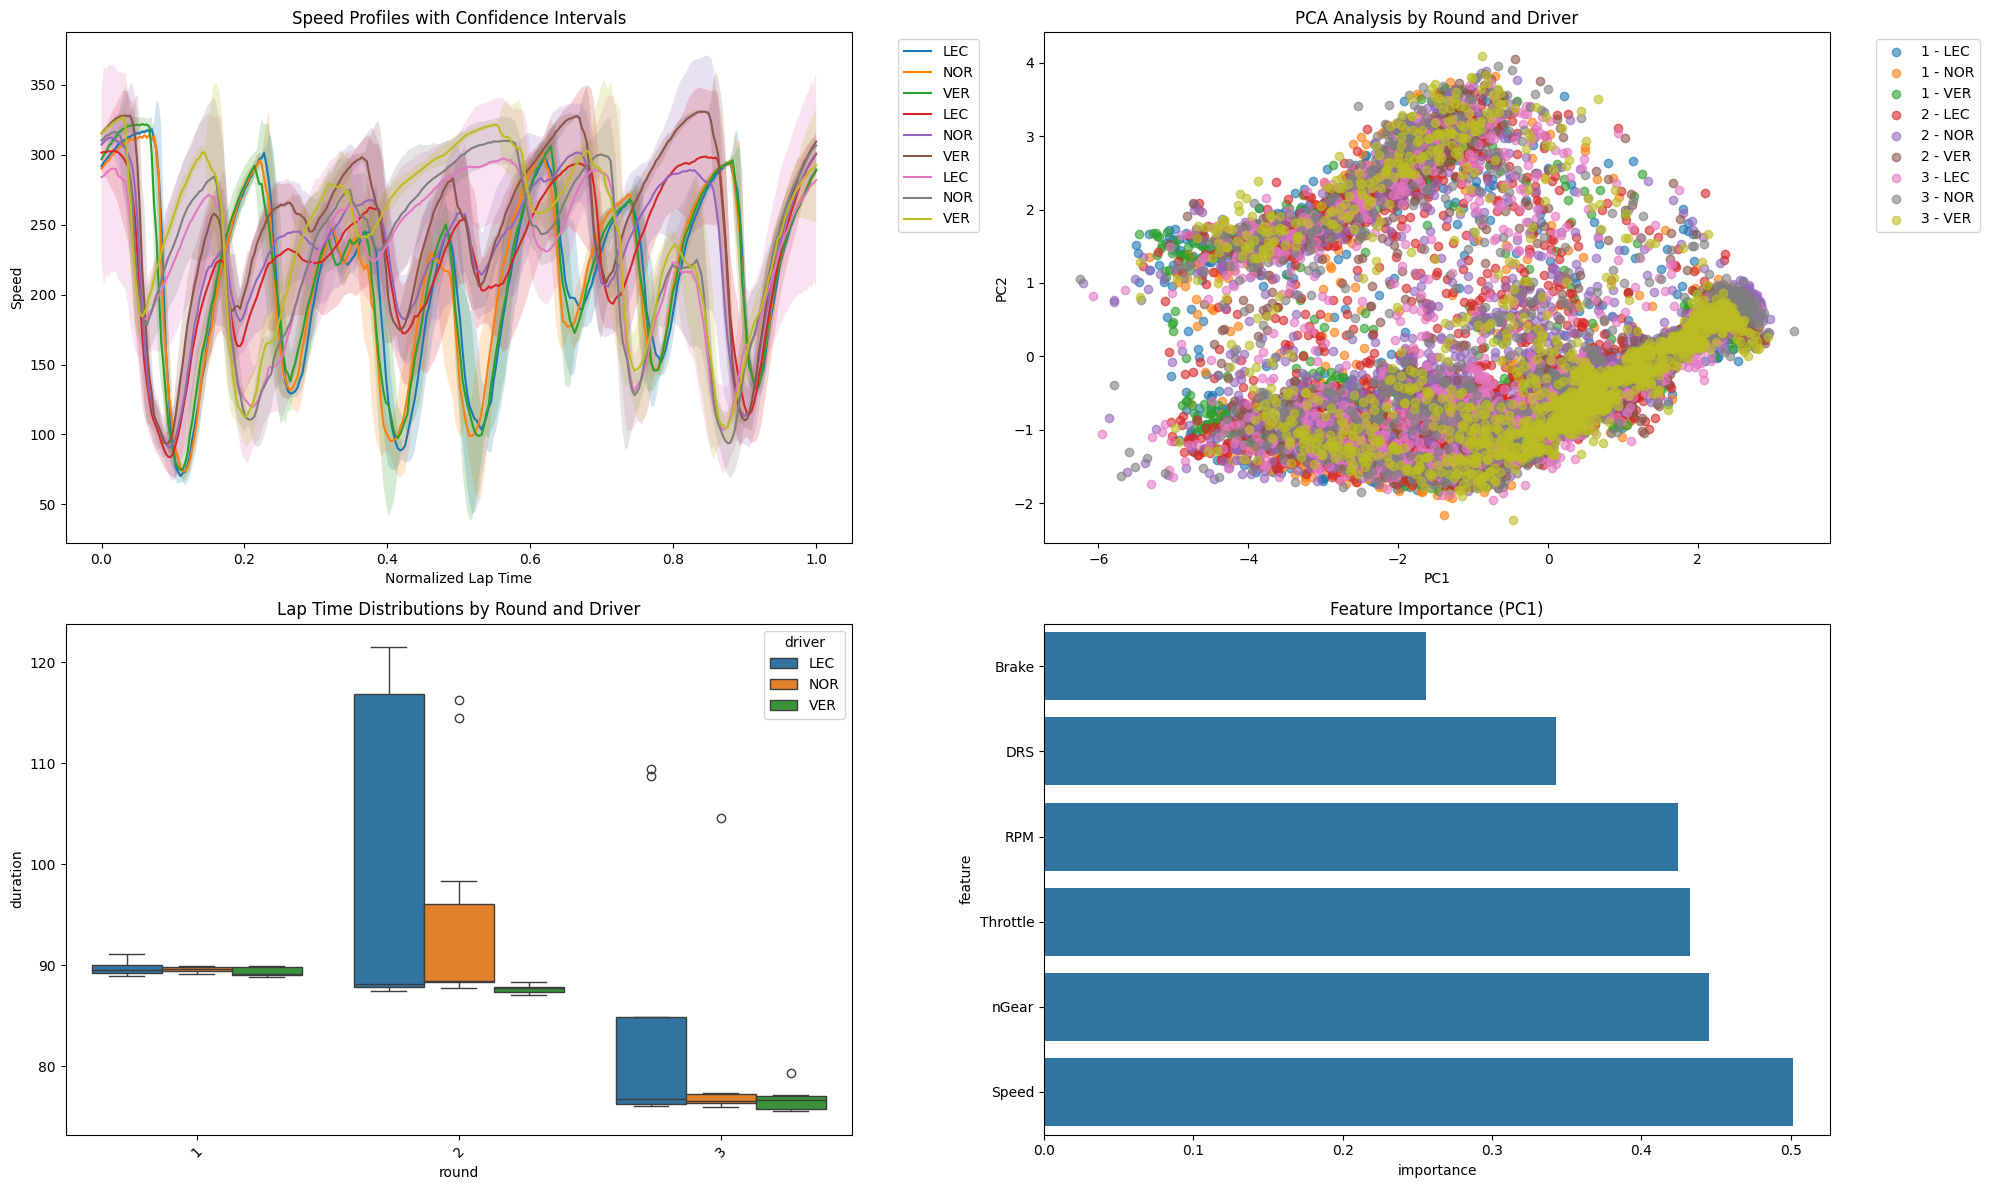

In [13]:
analyzer = F1TelemetryAnalyzer(n_samples=300)

results = analyzer.analyze_laps(
    quali_lap_data,
    rounds=[1, 2, 3],
    drivers=["VER", "NOR", "LEC"]
)

## Extracting Race Data

In [31]:
f1_processor = F1DataProcessor("cache", 2024)
race_data, race_lap_data = f1_processor.get_race_session(range(1,22))

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
/Users/katecastillo/Documents/learning/f1-exploration/utils/ex

In [32]:
race_data

,Round,Driver,DriverNumber,Team,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Deleted,DeletedReason,LapStartDate,LapEndDate
0,1,VER,1,Red Bull Racing,0 days 00:01:37.284000,1.0,1.0,NaN,41.266,23.616,...,251.0,False,SOFT,4.0,False,12,False,,2024-03-02 15:03:42.342,2024-03-02 15:05:19.626
1,1,VER,1,Red Bull Racing,0 days 00:01:36.296000,2.0,1.0,30.916,41.661,23.719,...,287.0,True,SOFT,5.0,False,1,False,,2024-03-02 15:05:19.941,2024-03-02 15:06:56.237
2,1,VER,1,Red Bull Racing,0 days 00:01:36.753000,3.0,1.0,30.999,41.966,23.788,...,290.0,False,SOFT,6.0,False,1,False,,2024-03-02 15:06:56.237,2024-03-02 15:08:32.990
3,1,VER,1,Red Bull Racing,0 days 00:01:36.647000,4.0,1.0,30.931,41.892,23.824,...,NaN,False,SOFT,7.0,False,1,False,,2024-03-02 15:08:32.990,2024-03-02 15:10:09.637
4,1,VER,1,Red Bull Racing,0 days 00:01:37.173000,5.0,1.0,31.255,42.056,23.862,...,289.0,False,SOFT,8.0,False,1,False,,2024-03-02 15:10:09.637,2024-03-02 15:11:46.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,21,PIA,81,McLaren,0 days 00:01:21.840000,65.0,3.0,20.784,43.137,17.919,...,277.0,False,INTERMEDIATE,35.0,False,1,False,,2024-11-03 17:50:37.939,2024-11-03 17:51:59.779
1131,21,PIA,81,McLaren,0 days 00:01:21.884000,66.0,3.0,20.864,43.215,17.805,...,275.0,False,INTERMEDIATE,36.0,False,1,False,,2024-11-03 17:51:59.779,2024-11-03 17:53:21.663
1132,21,PIA,81,McLaren,0 days 00:01:22.286000,67.0,3.0,21.336,43.159,17.791,...,276.0,False,INTERMEDIATE,37.0,False,1,False,,2024-11-03 17:53:21.663,2024-11-03 17:54:43.949
1133,21,PIA,81,McLaren,0 days 00:01:21.719000,68.0,3.0,20.873,42.918,17.928,...,270.0,True,INTERMEDIATE,38.0,False,1,False,,2024-11-03 17:54:43.949,2024-11-03 17:56:05.668


In [33]:
race_lap_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,LapNumber,CumulativeDistance,Driver,Round
0,2024-03-02 15:03:42.390,9963,0,1,15,1,1,car,0 days 00:00:00.048000,0 days 00:59:59.959000,0.000000,1,0.000000,VER,1
1,2024-03-02 15:03:42.630,9755,0,1,15,1,1,car,0 days 00:00:00.288000,0 days 01:00:00.199000,0.000000,1,0.000000,VER,1
2,2024-03-02 15:03:42.870,8495,3,1,15,0,1,car,0 days 00:00:00.528000,0 days 01:00:00.439000,0.200000,1,0.200000,VER,1
3,2024-03-02 15:03:43.110,6815,11,1,15,0,1,car,0 days 00:00:00.768000,0 days 01:00:00.679000,0.933333,1,1.133333,VER,1
4,2024-03-02 15:03:43.270,5695,17,1,15,0,1,car,0 days 00:00:00.928000,0 days 01:00:00.839000,1.688889,1,2.822222,VER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28571,2024-11-03 17:57:26.132,10841,310,8,99,0,1,car,0 days 02:07:28.616000,0 days 03:19:23.386000,292761.490833,69,527212.923056,PIA,21
28572,2024-11-03 17:57:26.412,10838,310,8,99,0,1,car,0 days 02:07:28.896000,0 days 03:19:23.666000,292785.601944,69,531086.921389,PIA,21
28573,2024-11-03 17:57:26.572,10857,311,8,99,0,1,car,0 days 02:07:29.056000,0 days 03:19:23.826000,292799.424167,69,534974.741944,PIA,21
28574,2024-11-03 17:57:26.811,10857,311,8,99,0,1,car,0 days 02:07:29.295000,0 days 03:19:24.065000,292820.071111,69,538883.209444,PIA,21


                         Date    RPM  Speed  nGear  Throttle  Brake  DRS  \
0     2024-06-23 13:03:14.547  10057      0      1        18      1    1   
1     2024-06-23 13:03:14.867   8955      0      1        18      0    1   
2     2024-06-23 13:03:15.306   6015     15      1        20      0    1   
3     2024-06-23 13:03:15.707   4312     29      1        28      0    1   
4     2024-06-23 13:03:16.107   5650     45      1        46      0    1   
...                       ...    ...    ...    ...       ...    ...  ...   
20677 2024-08-25 14:34:22.162  10761    302      8       100      0    0   
20678 2024-08-25 14:34:22.402  10837    304      8       100      0    0   
20679 2024-08-25 14:34:22.602  10834    304      8       100      0    0   
20680 2024-08-25 14:34:23.042  10901    306      8       100      0    0   
20681 2024-08-25 14:34:23.202  10944    307      8       100      0    0   

      Source                   Time            SessionTime       Distance  \
0        c

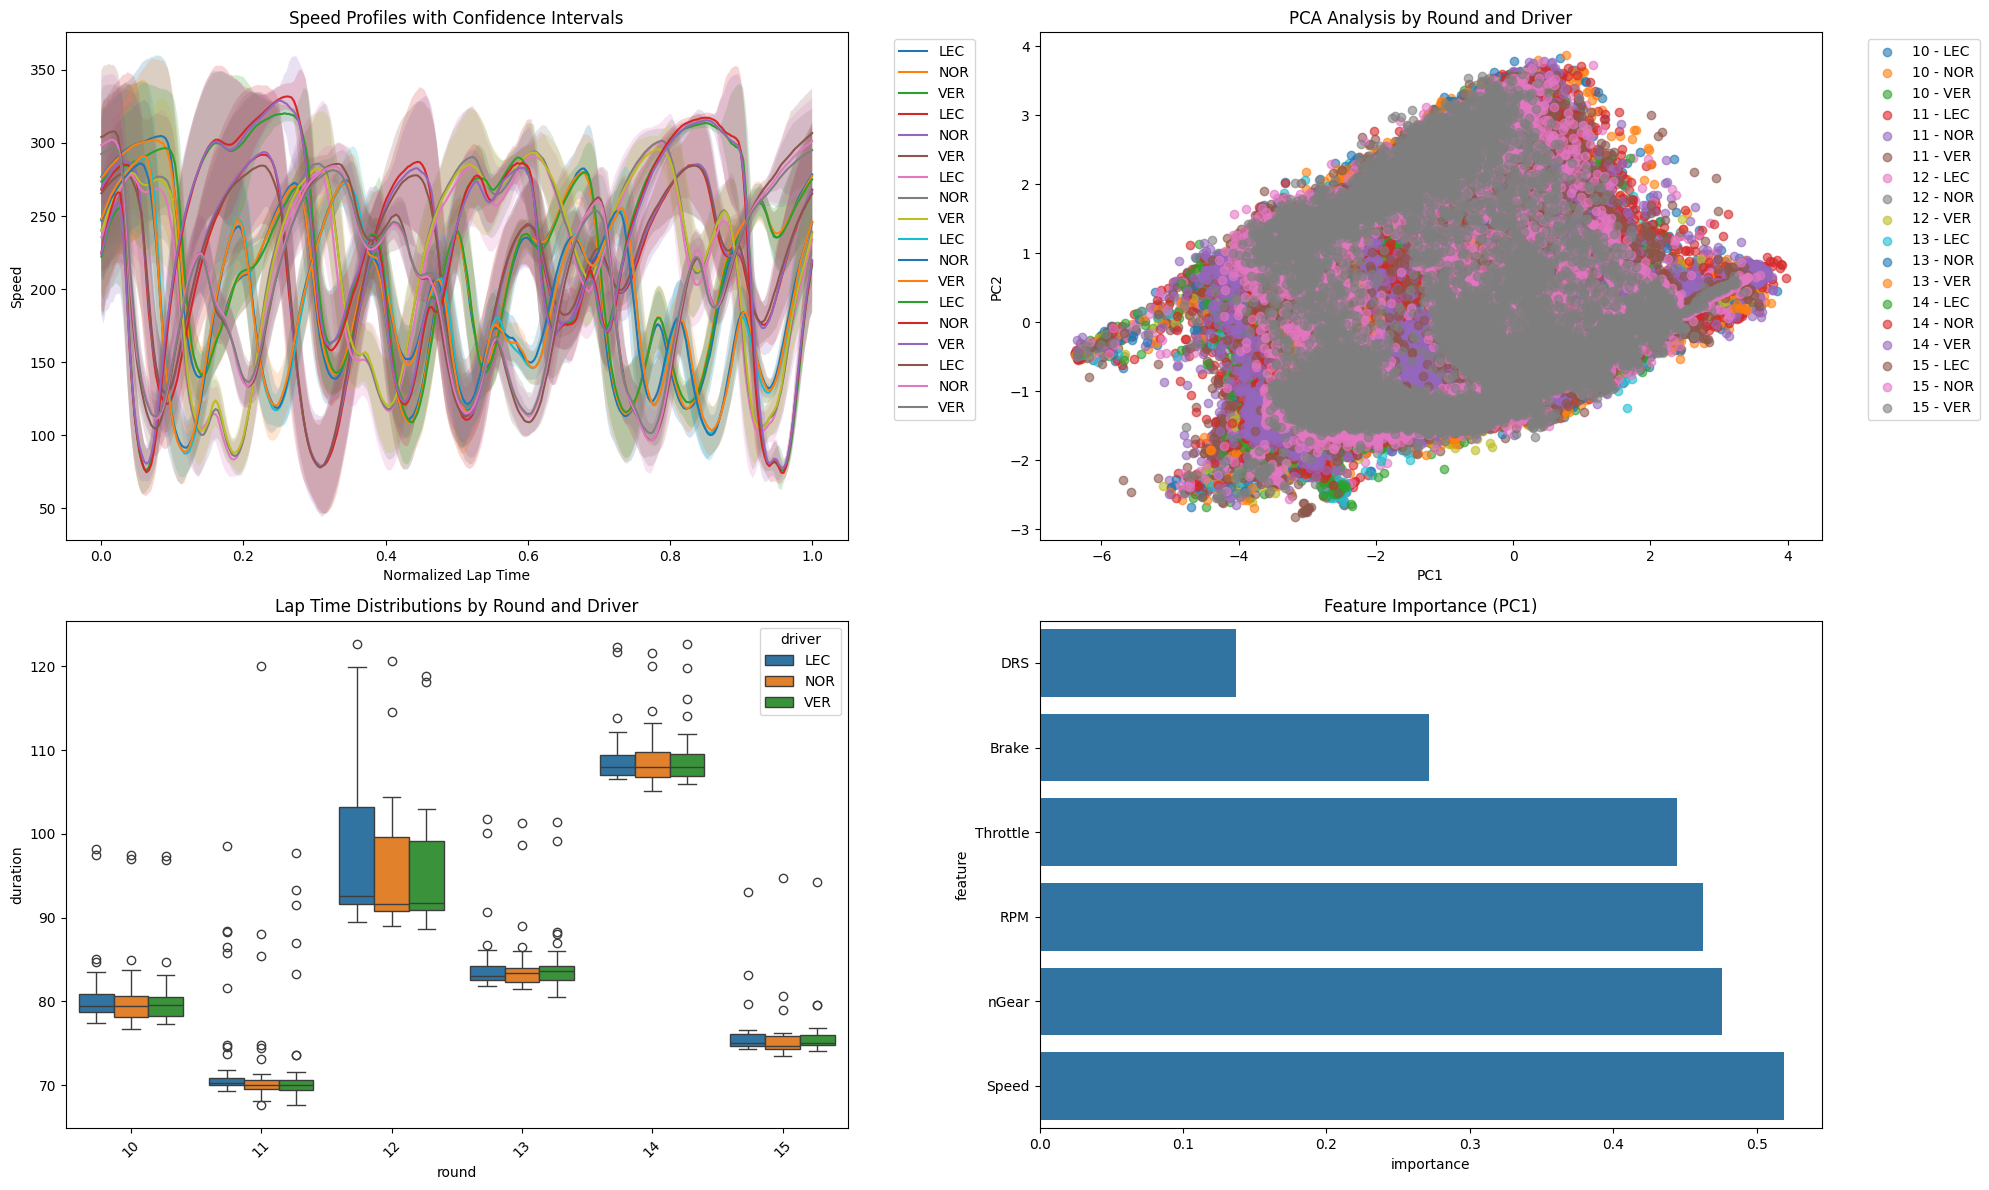

In [104]:
analyzer = F1TelemetryAnalyzer(n_samples=300)

results = analyzer.analyze_laps(
    race_lap_data,
    rounds=list(range(10, 16)),
    drivers=["VER", "NOR", "LEC"]
)

In [105]:
results

{'processed_data':               RPM       Speed     nGear    Throttle     Brake  DRS  Round  \
 0    10399.567632    4.960356  1.094259   37.284295  0.972979  1.0     10   
 1     8794.966681   -0.373874  0.993758   36.536347 -0.020894  1.0     10   
 2     5773.892214   14.985111  0.984563   35.304815  0.021219  1.0     10   
 3     4722.963597   26.806762  1.024963   39.472229 -0.021573  1.0     10   
 4     5327.623163   42.527247  0.969370   43.100380  0.021958  1.0     10   
 ..            ...         ...       ...         ...       ...  ...    ...   
 295  10576.414484  298.554439  7.972259   97.837814 -0.007389  0.0     15   
 296  10643.532590  298.886540  8.010425  103.015566  0.006416  0.0     15   
 297  10671.514130  300.066874  7.996588   93.768792 -0.005221  0.0     15   
 298  10194.548899  290.860188  8.000518   -6.018228  0.003777  0.0     15   
 299  10068.118423  284.337019  8.000326    3.217617 -0.002051  0.0     15   
 
     Driver  LapNumber  normalized_time     

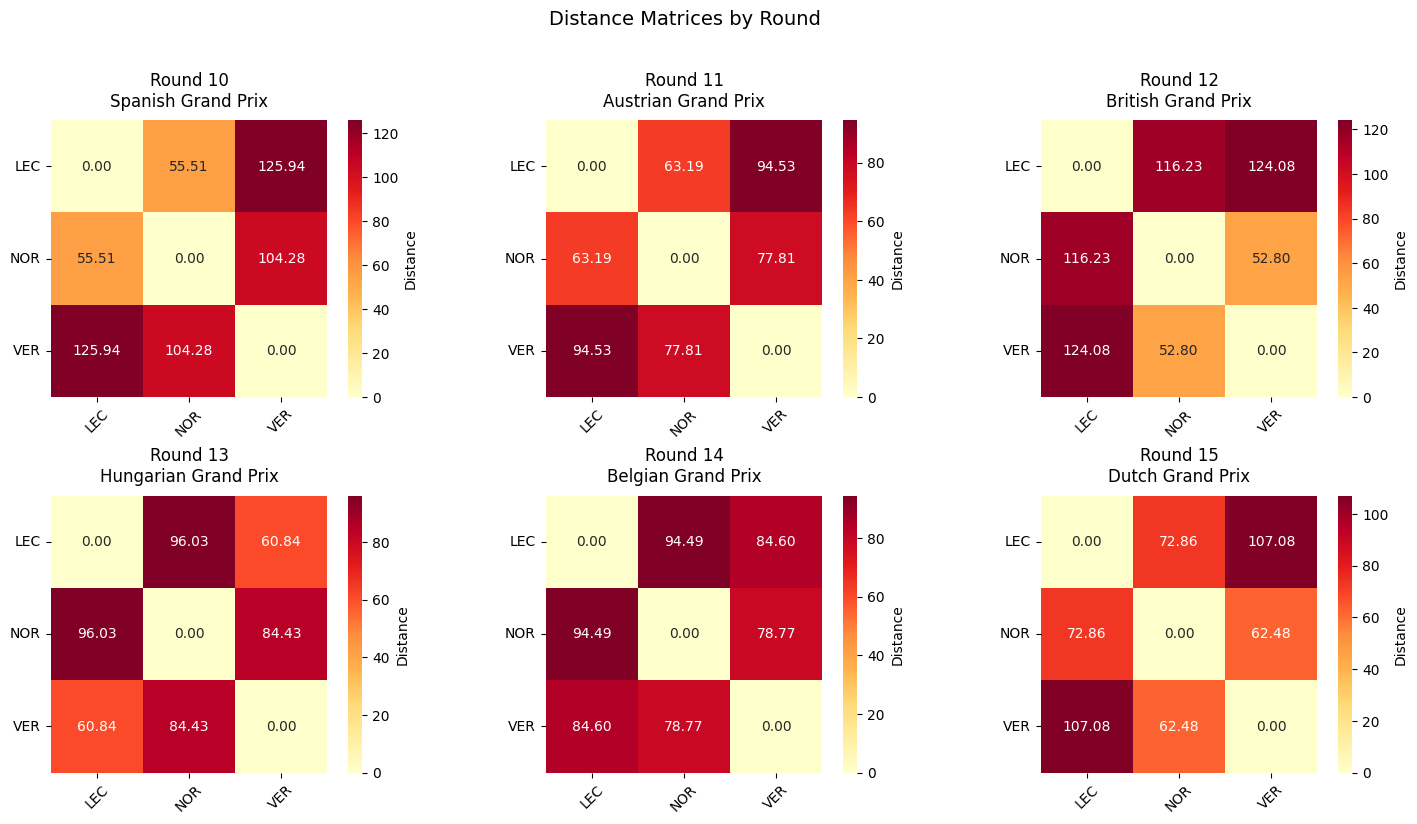

In [107]:
from core.utils import plot_distance_matrices

plot_distance_matrices(results)

## QUALI TELEMETRY NORMALIZED

In [108]:
processor = F1DataProcessor(cache_dir="cache", year=2024)

# Get normalized qualifying data
quali_data, quali_telemetry = processor.get_quali_session(
    rounds=[1, 2], 
    normalize_telemetry=True, 
    target_points=300
)

# # Get normalized race data
# race_data, race_telemetry = processor.get_race_session(
#     rounds=[1, 2], 
#     normalize_telemetry=True, 
#     target_points=300  # Different number of points if desired
# )

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
/Users/katecastillo/Documents/learning/f1-exploration/core/extract.py:124: SettingWithCopyWarning: 
A value i

In [86]:
df = quali_telemetry

metric_cols = ["RPM", "Speed", "nGear", "Throttle", "Brake", "DRS"]
    
grouped_data = []

for (round_num, driver, lap_num), lap_data in df.groupby(["Round", "Driver", "LapNumber"]):
    new_columns = []
    for metric in metric_cols:
        new_columns.extend([f"{metric}_{i}" for i in range(len(lap_data))])
    
    reshaped_data = {
        "Round": round_num,
        "Driver": driver,
        "LapNumber": lap_num
    }
    
    for metric in metric_cols:
        for idx, value in enumerate(lap_data[metric]):
            reshaped_data[f"{metric}_{idx}"] = value
    
    grouped_data.append(reshaped_data)

reshaped_df = pd.DataFrame(grouped_data)

reshaped_df.set_index(["Round", "Driver", "LapNumber"], inplace=True)

In [87]:
reshaped_df

RPM_0         RPM_1         RPM_2         RPM_3  \
Round Driver LapNumber                                                      
1     ALB    1          10346.0  10385.096990  10424.705686  10561.056856   
             2          10547.0  10663.391304  10778.672241  10889.307692   
             3          10163.0  10425.956522  10561.086957  10669.478261   
             4          10488.0  10658.214047  10785.829431  10857.668896   
      ALO    1          10506.0  10590.341137  10798.979933  10861.732441   
...                         ...           ...           ...           ...   
2     VER    2          11185.0  11165.000000  11174.551839  11236.227425   
             3          11156.0  11195.979933  11262.287625  11369.762542   
             4          11248.0  11254.862876  11304.541806  11403.110368   
             5          11170.0  11271.759197  11324.418060  11407.769231   
             6          11179.0  11274.936455  11346.688963  11389.030100   

                               RPM_4         RPM_5         RPM_6  \
Round Driver LapNumber                                             
1     ALB    1          10626.892977  10693.501672  10741.264214   
             2          10979.749164  11044.866221  11116.454849   
             3          10760.869565  10804.826087  10941.043478   
             4          10938.307692  11071.501672  11159.795987   
      ALO    1          10911.234114  10940.250836  11021.441472   
...                              ...           ...           ...   
2     VER    2          11294.742475  11343.926421  11421.836120   
             3          11402.377926  11475.876254  11497.642140   
             4          11488.983278  11523.484950  11518.755853   
             5          11470.551839  11505.391304  11526.270903   
             6          11428.709030  11483.682274  11529.013378   

                               RPM_7         RPM_8         RPM_9  ...  \
Round Driver LapNumber                                            ...   
1     ALB    1          10808.872910  10893.244147  10949.140468  ...   
             2          11187.270903  11211.066890  11280.675585  ...   
             3          11042.173913  11096.173913  11169.086957  ...   
             4          11158.488294  11206.762542  11234.287625  ...   
      ALO    1          11074.247492  11083.301003  11107.471572  ...   
...                              ...           ...           ...  ...   
2     VER    2          11443.100334  11424.267559  11462.826087  ...   
             3          11540.692308  11561.173913  11514.926421  ...   
             4          11612.434783  11566.066890  11548.053512  ...   
             5          11511.284281  11547.782609  11530.812709  ...   
             6          11542.949833  11540.635452  11590.933110  ...   

                        DRS_290  DRS_291  DRS_292    DRS_293    DRS_294  \
Round Driver LapNumber                                                    
1     ALB    1              8.0      8.0      8.0   8.000000   8.000000   
             2              8.0      8.0      8.0   8.000000   9.585284   
             3              8.0      8.0      8.0   8.000000   8.000000   
             4              8.0      8.0      8.0   9.906355  14.000000   
      ALO    1              8.0      8.0      8.0   9.424749  14.000000   
...                         ...      ...      ...        ...        ...   
2     VER    2             12.0     12.0     12.0  12.000000  12.000000   
             3             12.0     12.0     12.0  12.000000  12.000000   
             4             12.0     12.0     12.0  12.000000  12.000000   
             5             12.0     12.0     12.0  12.000000  12.000000   
             6             12.0     12.0     12.0  12.000000  12.000000   

                          DRS_295    DRS_296  DRS_297  DRS_298  DRS_299  
Round Driver LapNumber                                                   
1     ALB    1           9.665552  13.083612     12.0     12.0   

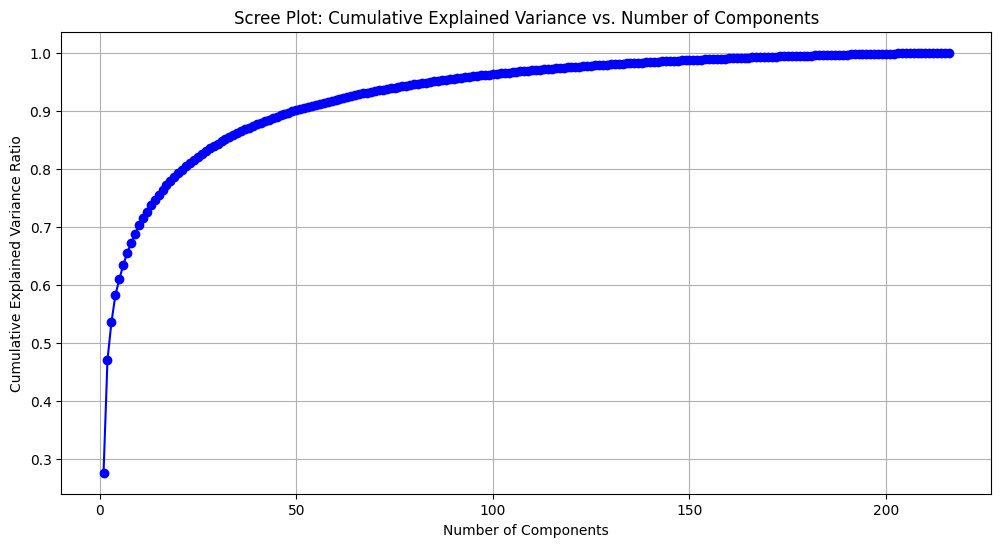

Number of components needed for 95% variance: 85


In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = reshaped_df.copy()
    
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initial PCA to determine optimal components
pca_all = PCA()
pca_all.fit(X_scaled)

# Scree plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca_all.explained_variance_ratio_) + 1), 
        np.cumsum(pca_all.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot: Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Determine optimal components (e.g., 95% variance explained)
n_components = np.argmax(np.cumsum(pca_all.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components}")

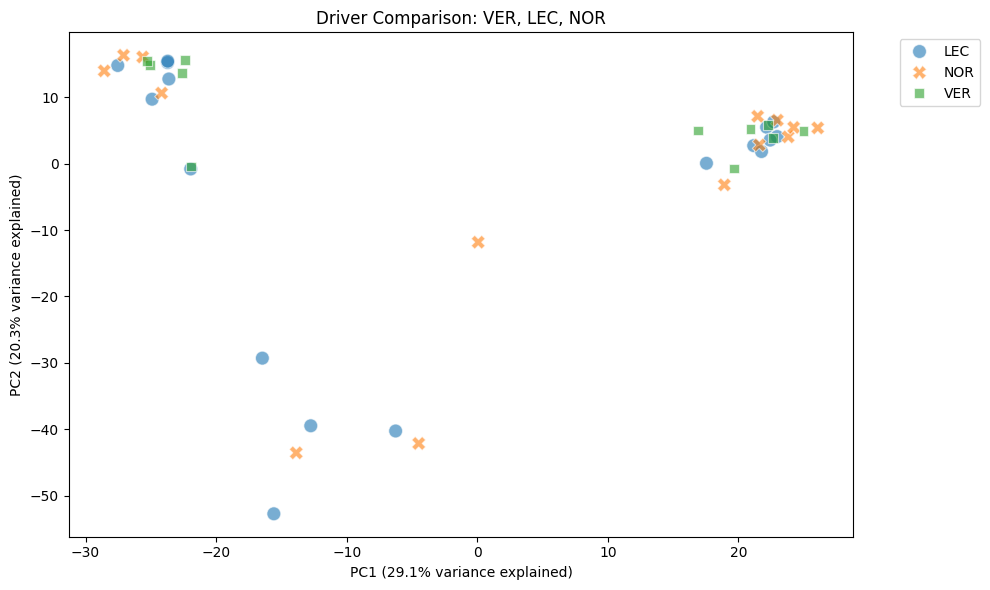

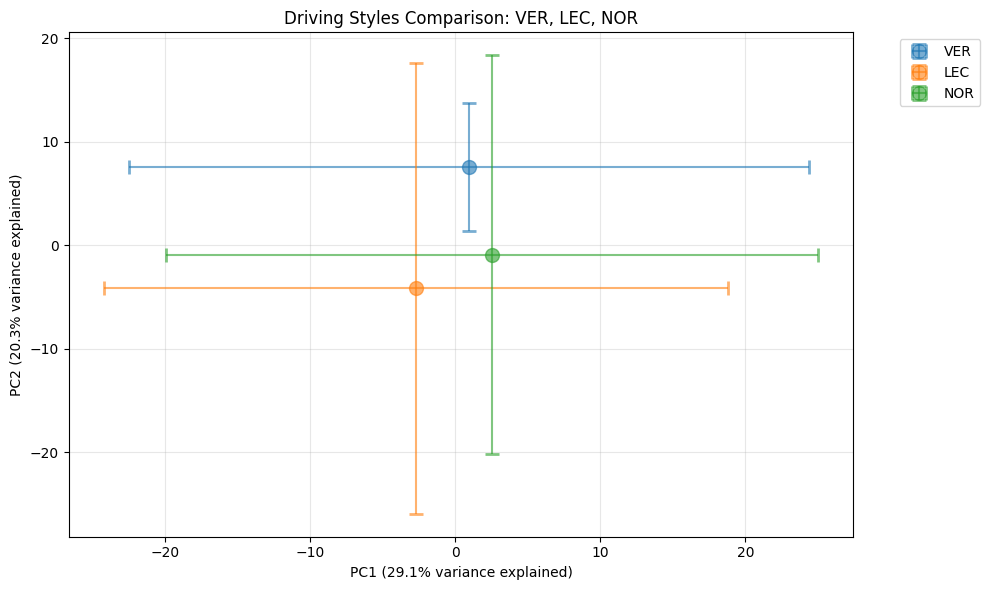


Driver Centroids (average position in PCA space):
             PC1       PC2       PC3
Driver                              
LEC    -2.686435 -4.158913 -2.893333
NOR     2.527673 -0.886407  4.110235
VER     0.934725  7.555565 -0.759694

Driver Variability (spread in PCA space):
              PC1        PC2        PC3
Driver                                 
LEC     21.506962  21.761360   5.262461
NOR     22.465935  19.253016  19.857237
VER     23.433612   6.203825   5.962181

Pairwise Distances between Drivers:
VER vs LEC: 12.45
VER vs NOR: 9.88
LEC vs NOR: 9.32


In [100]:
from core.utils import analyze_selected_drivers_pca

df_for_pca = reshaped_df.reset_index()
driver_info = df_for_pca[["Driver"]]

# Specify drivers to compare
selected_drivers = ["VER", "LEC", "NOR"]  # Replace with your desired drivers

# Run comparison
results = analyze_selected_drivers_pca(df_for_pca, driver_info, selected_drivers)

In [121]:
session.laps.pick_fastest().get_car_data()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2024-03-02 16:05:28.521,11259,285,7,100,False,0,car,0 days 00:00:00.133000,0 days 02:01:46.090000
1,2024-03-02 16:05:28.801,11353,286,7,100,False,0,car,0 days 00:00:00.413000,0 days 02:01:46.370000
2,2024-03-02 16:05:28.961,11357,287,7,100,False,0,car,0 days 00:00:00.573000,0 days 02:01:46.530000
3,2024-03-02 16:05:29.161,11406,289,7,100,False,0,car,0 days 00:00:00.773000,0 days 02:01:46.730000
4,2024-03-02 16:05:29.601,11489,291,7,100,False,0,car,0 days 00:00:01.213000,0 days 02:01:47.170000
...,...,...,...,...,...,...,...,...,...,...
344,2024-03-02 16:06:59.881,10991,275,7,100,False,0,car,0 days 00:01:31.493000,0 days 02:03:17.450000
345,2024-03-02 16:07:00.201,11056,278,7,100,False,0,car,0 days 00:01:31.813000,0 days 02:03:17.770000
346,2024-03-02 16:07:00.361,11124,279,7,100,False,0,car,0 days 00:01:31.973000,0 days 02:03:17.930000
347,2024-03-02 16:07:00.521,11140,281,7,100,False,0,car,0 days 00:01:32.133000,0 days 02:03:18.090000


In [123]:
race = session.laps

race[race["Driver"]=="LEC"]

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
171,0 days 01:01:38.497000,LEC,16,0 days 00:01:38.271000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.549000,...,False,Ferrari,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,2.0,False,,False,False
172,0 days 01:03:15.359000,LEC,16,0 days 00:01:36.862000,2.0,1.0,NaT,NaT,0 days 00:00:31.166000,0 days 00:00:41.864000,...,False,Ferrari,0 days 01:01:38.497000,2024-03-02 15:05:20.928,1,2.0,False,,False,True
173,0 days 01:04:53.421000,LEC,16,0 days 00:01:38.062000,3.0,1.0,NaT,NaT,0 days 00:00:31.223000,0 days 00:00:42.856000,...,False,Ferrari,0 days 01:03:15.359000,2024-03-02 15:06:57.790,1,3.0,False,,False,True
174,0 days 01:06:31.173000,LEC,16,0 days 00:01:37.752000,4.0,1.0,NaT,NaT,0 days 00:00:30.958000,0 days 00:00:42.784000,...,False,Ferrari,0 days 01:04:53.421000,2024-03-02 15:08:35.852,1,3.0,True,TRACK LIMITS AT TURN 10 LAP 4,False,True
175,0 days 01:08:09.304000,LEC,16,0 days 00:01:38.131000,5.0,1.0,NaT,NaT,0 days 00:00:31.192000,0 days 00:00:42.872000,...,False,Ferrari,0 days 01:06:31.173000,2024-03-02 15:10:13.604,1,3.0,False,,False,True
176,0 days 01:09:47.086000,LEC,16,0 days 00:01:37.782000,6.0,1.0,NaT,NaT,0 days 00:00:30.936000,0 days 00:00:42.751000,...,False,Ferrari,0 days 01:08:09.304000,2024-03-02 15:11:51.735,1,3.0,False,,False,True
177,0 days 01:11:26.043000,LEC,16,0 days 00:01:38.957000,7.0,1.0,NaT,NaT,0 days 00:00:31.008000,0 days 00:00:43.761000,...,False,Ferrari,0 days 01:09:47.086000,2024-03-02 15:13:29.517,1,4.0,False,,False,True
178,0 days 01:13:04.179000,LEC,16,0 days 00:01:38.136000,8.0,1.0,NaT,NaT,0 days 00:00:31.200000,0 days 00:00:42.753000,...,False,Ferrari,0 days 01:11:26.043000,2024-03-02 15:15:08.474,1,4.0,False,,False,True
179,0 days 01:14:42.023000,LEC,16,0 days 00:01:37.844000,9.0,1.0,NaT,NaT,0 days 00:00:31.147000,0 days 00:00:42.533000,...,False,Ferrari,0 days 01:13:04.179000,2024-03-02 15:16:46.610,1,4.0,False,,False,True
180,0 days 01:16:19.907000,LEC,16,0 days 00:01:37.884000,10.0,1.0,NaT,NaT,0 days 00:00:30.988000,0 days 00:00:42.534000,...,False,Ferrari,0 days 01:14:42.023000,2024-03-02 15:18:24.454,12,4.0,False,,False,True


In [124]:
processor

F1DataProcessor(cache_dir='cache', year=2024)

In [125]:
class WeirdShit:
    pass

In [126]:
WeirdShit

__main__.WeirdShit

In [132]:
session = fastf1.get_session(2024, 21, "Q")
session.load()
session.race_control_messages

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core           INFO 	Processing timing data...
req            INFO 	Using

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
0,2024-11-03 10:29:00,Drs,DRS DISABLED,DISABLED,None,None,NaN,None,None
1,2024-11-03 10:30:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
2,2024-11-03 10:31:55,Flag,YELLOW IN TRACK SECTOR 13,None,YELLOW,Sector,13.0,None,None
3,2024-11-03 10:32:00,Flag,DOUBLE YELLOW IN TRACK SECTOR 13,None,DOUBLE YELLOW,Sector,13.0,None,None
4,2024-11-03 10:32:02,Flag,YELLOW IN TRACK SECTOR 12,None,YELLOW,Sector,12.0,None,None
...,...,...,...,...,...,...,...,...,...
110,2024-11-03 12:12:03,Other,FIRST CAR TO TAKE THE FLAG - CAR 30 (LAW),None,None,None,NaN,None,None
111,2024-11-03 12:13:07,Other,CAR 81 (PIA) LAP DELETED - TRACK LIMITS AT TUR...,None,None,None,NaN,None,None
112,2024-11-03 12:16:00,Other,INCIDENT INVOLVING CAR 22 (TSU) NOTED - FAILIN...,None,None,None,NaN,None,None
113,2024-11-03 12:17:25,Other,FIA STEWARDS: INCIDENT INVOLVING CAR 22 (TSU) ...,None,None,None,NaN,None,None


In [136]:
race_control_df = session.race_control_messages
quali_sessions = race_control_df[(race_control_df.Message.str.contains("GREEN LIGHT")) |
                                    (race_control_df.Message.str.contains("CHEQUERED FLAG")) |
                                    (race_control_df.Message.str.contains("WILL NOT BE RESUMED"))]

In [137]:
quali_sessions

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
1,2024-11-03 10:30:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
40,2024-11-03 10:47:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
54,2024-11-03 10:55:50,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None,None
59,2024-11-03 11:03:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
74,2024-11-03 11:20:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
83,2024-11-03 11:25:29,Other,Q2 WILL NOT BE RESUMED,None,None,None,NaN,None,None
88,2024-11-03 11:37:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
97,2024-11-03 11:54:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
108,2024-11-03 12:08:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
109,2024-11-03 12:11:31,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None,None


In [138]:
quali_sessions["GreenLightCount"] = (quali_sessions["Message"].str.contains("GREEN LIGHT")
                                        .groupby((quali_sessions["Message"] != quali_sessions["Message"].shift()).cumsum())
                                        .cumsum())
# quali_sessions = quali_sessions[quali_sessions["GreenLightCount"] == 1]

# quali_sessions["QualiSession"] = [
#     "Q" + str(i) for i in range(1, len(quali_sessions) + 1)]
# quali_sessions = quali_sessions[["Time", "QualiSession"]]

# q1_mask = (laps_df["LapStartDate"] >= quali_sessions.loc[quali_sessions["QualiSession"] == "Q1", "Time"].iloc[0]) & \
#     (laps_df["LapStartDate"] <
#         quali_sessions.loc[quali_sessions["QualiSession"] == "Q2", "Time"].iloc[0])

# q2_mask = (laps_df["LapStartDate"] >= quali_sessions.loc[quali_sessions["QualiSession"] == "Q2", "Time"].iloc[0]) & \
#     (laps_df["LapStartDate"] <
#         quali_sessions.loc[quali_sessions["QualiSession"] == "Q3", "Time"].iloc[0])

# q3_mask = laps_df["LapStartDate"] >= quali_sessions.loc[quali_sessions["QualiSession"]
#                                                         == "Q3", "Time"].iloc[0]

In [139]:
quali_sessions

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap,GreenLightCount
1,2024-11-03 10:30:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,1
40,2024-11-03 10:47:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,2
54,2024-11-03 10:55:50,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None,None,0
59,2024-11-03 11:03:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,1
74,2024-11-03 11:20:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,2
83,2024-11-03 11:25:29,Other,Q2 WILL NOT BE RESUMED,None,None,None,NaN,None,None,0
88,2024-11-03 11:37:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,1
97,2024-11-03 11:54:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,2
108,2024-11-03 12:08:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,3
109,2024-11-03 12:11:31,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None,None,0


In [140]:
quali_sessions = quali_sessions[quali_sessions["GreenLightCount"] == 1]
quali_sessions

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap,GreenLightCount
1,2024-11-03 10:30:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,1
59,2024-11-03 11:03:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,1
88,2024-11-03 11:37:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None,1


In [141]:
quali_sessions["QualiSession"] = [
    "Q" + str(i) for i in range(1, len(quali_sessions) + 1)]
quali_sessions = quali_sessions[["Time", "QualiSession"]]

quali_sessions

,Time,QualiSession
1,2024-11-03 10:30:00,Q1
59,2024-11-03 11:03:00,Q2
88,2024-11-03 11:37:00,Q3


In [143]:
session.laps.pick_fastest().get_car_data().add_distance()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-11-03 12:11:07.556,10701,306,8,100,False,9,car,0 days 00:00:00.236000,0 days 01:56:05.441000,20.060000
1,2024-11-03 12:11:07.716,10651,306,8,100,False,9,car,0 days 00:00:00.396000,0 days 01:56:05.601000,33.660000
2,2024-11-03 12:11:08.036,10713,307,8,100,False,9,car,0 days 00:00:00.716000,0 days 01:56:05.921000,60.948889
3,2024-11-03 12:11:08.196,10710,307,8,99,False,9,car,0 days 00:00:00.876000,0 days 01:56:06.081000,74.593333
4,2024-11-03 12:11:08.477,10775,307,8,99,False,9,car,0 days 00:00:01.157000,0 days 01:56:06.362000,98.556389
...,...,...,...,...,...,...,...,...,...,...,...
319,2024-11-03 12:12:29.717,10594,302,8,100,False,9,car,0 days 00:01:22.397000,0 days 01:57:27.602000,4155.063056
320,2024-11-03 12:12:29.917,10540,302,8,100,False,9,car,0 days 00:01:22.597000,0 days 01:57:27.802000,4171.840833
321,2024-11-03 12:12:30.197,10588,302,8,100,False,9,car,0 days 00:01:22.877000,0 days 01:57:28.082000,4195.329722
322,2024-11-03 12:12:30.357,10554,302,8,100,False,9,car,0 days 00:01:23.037000,0 days 01:57:28.242000,4208.751944
